In [90]:
# Loading all the important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
housing.shape

(1460, 81)

**Before we start analyzing numerical and categorical variable, lets separate the features into numerical and categorical**

In [6]:
numerical_var = housing.select_dtypes(include=['float64','int64'])
categorical_var = housing.select_dtypes(include=['object'])

In [7]:
categorical_var.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
numerical_var.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

**Analyzing numerical variables**

**Checking correlation among numerical variables**

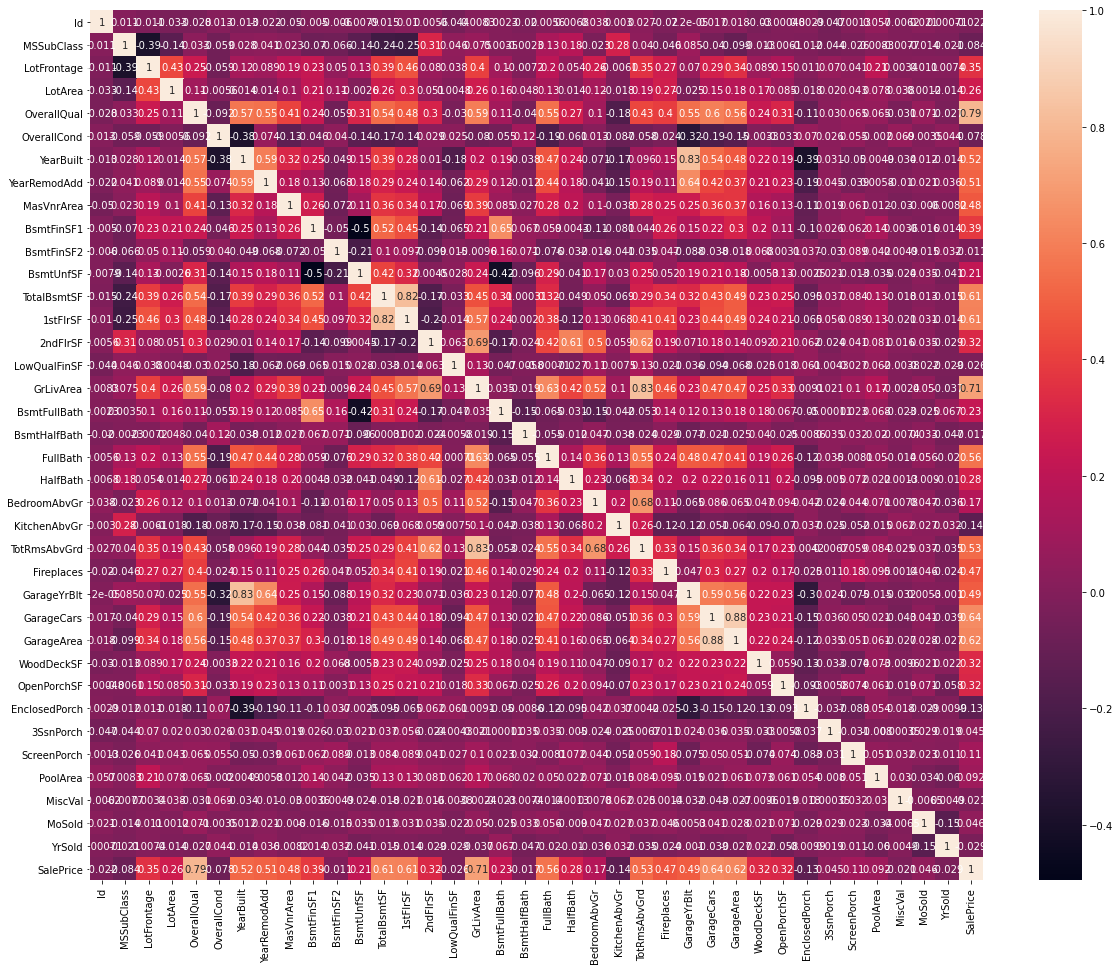

In [9]:
plt.figure(figsize=(20,16))
sns.heatmap(numerical_var.corr(), annot=True)
plt.show()

**Note :**
- From the above heatmap, we can conclude that there are independant variables available which are highly correlated
- GarageYrBlt and YearBuilt column have 0.83
- GarageCars and GarageArea has corr value of 0.88
- TotRmsAbvGrd and GrLivArea has corr value of 0.83
- TotalBsmtSF and 1stflrSF has corr value of 0.82

Before data modelling, one feature from each pair will be dropped

Analyzing the distribution of numerical feature

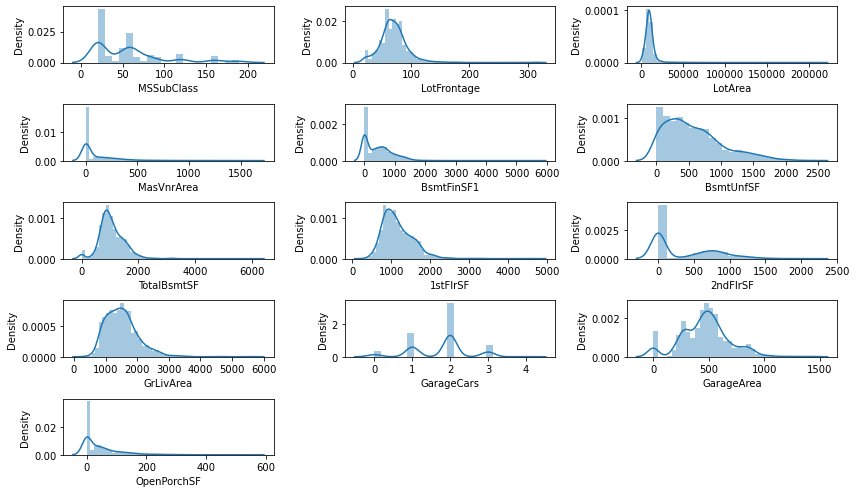

In [10]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing[feature])
    plt.tight_layout()

Outlier Detection

In [11]:
outlier_percentage = {}

for feature in numerical_var.columns:
    IQR = numerical_var[feature].quantile(.75)-numerical_var[feature].quantile(.25)
    outliers_count = numerical_var[(numerical_var[feature]>numerical_var[feature].quantile(0.75)+1.5*IQR) | (numerical_var[feature]<numerical_var[feature].quantile(.25)-1.5*IQR)].shape[0]
    outlier_percentage[feature]=round(outliers_count/numerical_var.shape[0]*100,2)
    
outlier_df = pd.DataFrame({'Features':list(outlier_percentage.keys()), 'Percentage': list(outlier_percentage.values())})
outlier_df.sort_values(by='Percentage', ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


**Note:**
- As shown in above table, most of the numeric features are having outliers with certain %.
- To handle outliers, instead of dropping we can substitute fixed min and max values to those rows where feature values are outside the range of [< 25th percentile - 1.5 * IQR and > 75th percentile + 1.5 * IQR]

In [12]:
for feature,percentage in outlier_percentage.items():
    if feature!='SalePrice':
        IQR = housing[feature].quantile(.75)-housing[feature].quantile(.25)
        max_value = housing[feature].quantile(.75) + 1.5 * IQR
        min_value = housing[feature].quantile(.25) - 1.5 * IQR
        housing[feature][housing[feature] > max_value] = max_value
        housing[feature][housing[feature] < min_value ] = min_value

In [13]:
housing[['LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,1503.735873,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0
std,0.0,481.375641,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0
min,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,1129.500000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,1464.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,1776.750000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,2747.625000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0


As shown from the above describe output, there are some features which are having fixed values and therefore will not help in predicton. We can remove these features

In [14]:
housing.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

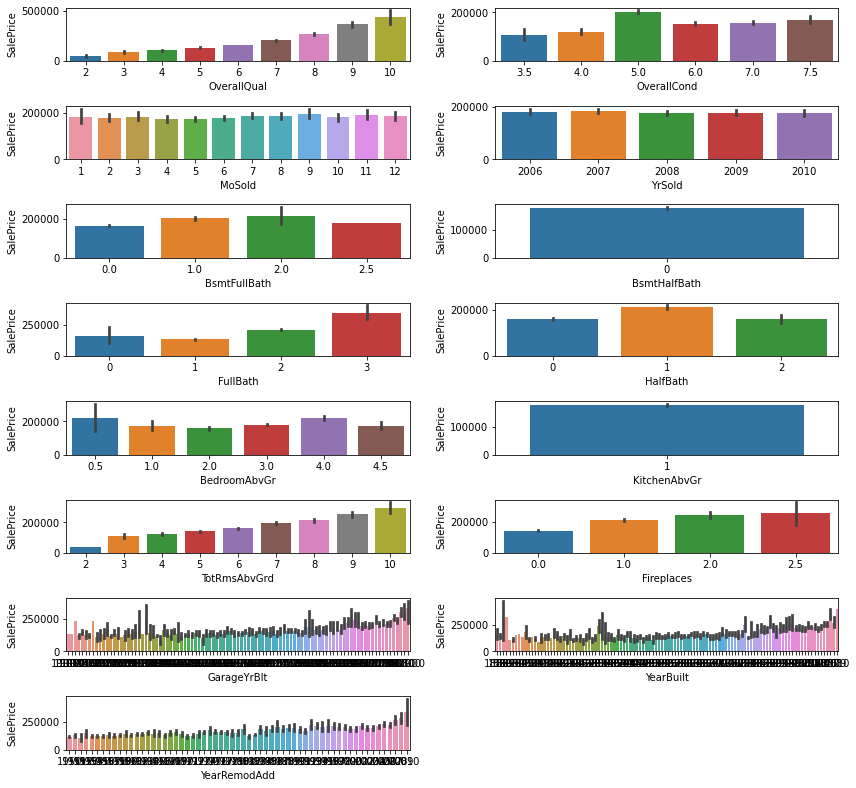

In [15]:
# Visulaizing independent variable against target variable

plt.figure(figsize=(12,12))

for i, var in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9,2,i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x = housing[var], y = housing['SalePrice'])
    plt.tight_layout()

**Comment:**
Following are the observations from the plots.
- 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

- 'OverallCond' : SalePrice is highest for rating 5

- 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

- 'FullBath' = 2 and 'HalfBath' = 1 have highest SalePrice 

- 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price

- 'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' : Will extract new features from to identify any trend

- 'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight

From above barplots, we can see KitchenAbgGr and BsmntHalfBath features are of no use. So we can drop.

In [16]:
housing.drop(['KitchenAbvGr','BsmtHalfBath'], axis = 1, inplace=True)

In [17]:
# Converting the year related features into number of years

for i in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing[i] = date.today().year - housing[i]

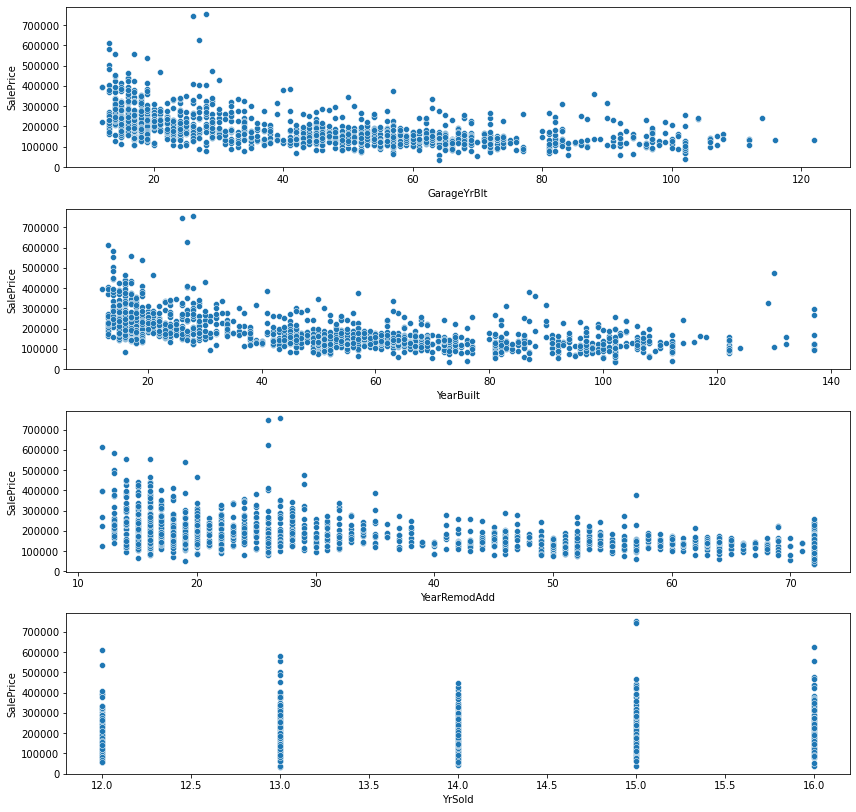

In [18]:
fig=plt.subplots(figsize=(12,25))

for i, var in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(9,1,i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x = housing[var], y = housing['SalePrice'])
    plt.tight_layout()

**Comment:**
- For most the realty properties Garage is built within last 20 years, SalePrice is more recently built garages
- SalePrice is more lower value of YearBuilt i.e. more recently build houses
- Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice 
- YrSold still does not show any significant trend

### Handling missing numerical features

In [19]:
housing.shape

(1460, 73)

In [20]:
for i in housing.select_dtypes(exclude='object').columns:
    if housing[i].isnull().any():
        print(i,':', round(housing[i].isnull().sum() / housing.shape[0],2)*100)

LotFrontage : 18.0
MasVnrArea : 1.0
GarageYrBlt : 6.0


In [21]:
housing = housing[~housing['MasVnrType'].isnull()]
housing.drop(['Id'], axis=1, inplace=True)
numerical_var.drop(['Id'], axis=1, inplace=True)

**Comment:**

- GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
- GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
- TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
- TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
- Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [22]:
housing.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)


In [23]:
print(housing.columns.shape)

(68,)


### Analyzing Categorical Features

In [24]:
categorical_var.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

**Missing Value Handling - Categorical Features**

In [25]:
#housing[categorical_var.columns].isnull().sum()
#housing[categorical_var.columns].info()

for i in housing.select_dtypes(include='object').columns:
    if housing[i].isnull().any():
        print(i, ':', round(housing[i].isnull().sum()/housing.shape[0],2)*100)

Alley : 94.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


**Comment:**
- For 'Alley', Nan means 'No access to alley'
- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
- For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
- MiscFeature - Nan means no additional features mentioned.

All these features will be imputed with meaningful values in place of missing data.

In [26]:
housing['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [27]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(housing[mv_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [28]:
housing[mv_categorical_features] = housing[mv_categorical_features].fillna(value='Not Applicable', axis=1)

In [29]:
print(housing[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [30]:
housing['Electrical'].isnull().sum()

1

In [31]:
housing.drop(['PoolQC'], axis=1, inplace= True)
housing.dropna(subset=['Electrical'], inplace=True)

In [32]:
housing['Electrical'].isnull().sum()

0

In [33]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing.columns:
    if housing[feat].isnull().any():
        print(feat, ':', round(housing[feat].isnull().sum()/housing.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0


**Analyzing ordered independent variables**

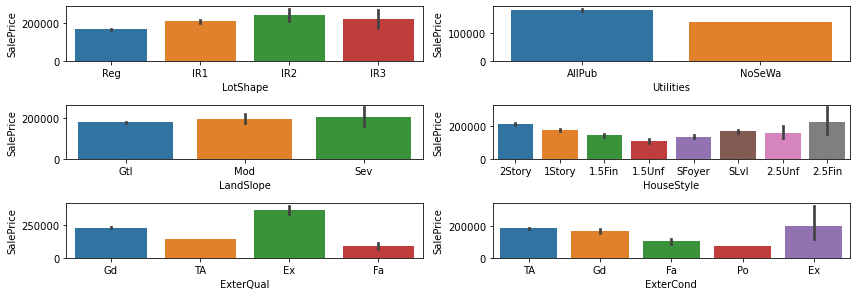

In [34]:
plt.figure(figsize=(12,12))

for i, var in enumerate(['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']):
    plt.subplot(9,2,i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x = housing[var], y = housing['SalePrice'])
    plt.tight_layout()

**Comment:**
- 'LotShape' : Slightly irregular LotShape have the highest SalePrice
- 'Utilities' : Most of the houses in the dataset have all the public utilities
- 'LandSlope' : Houses at severe land slope have lowest SalePrice
- 'HouseStyle' : 2 storied houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

**Analyzing unordered independent variables**

In [35]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

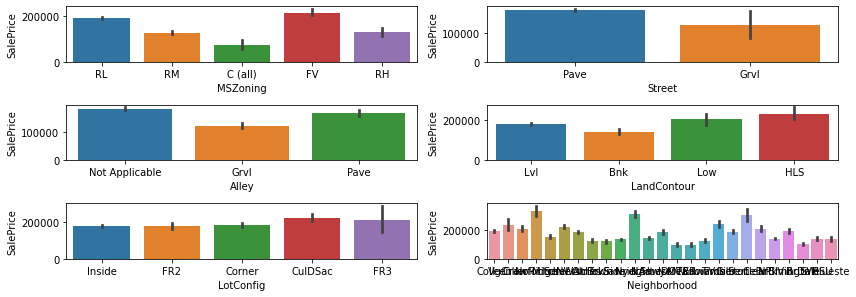

In [36]:
plt.figure(figsize=(12,12))

for i, var in enumerate(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood']):
    plt.subplot(9,2,i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x = housing[var], y = housing['SalePrice'])
    plt.tight_layout()

**Comment:**

- Most of the houses do not have alley
- Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
- Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

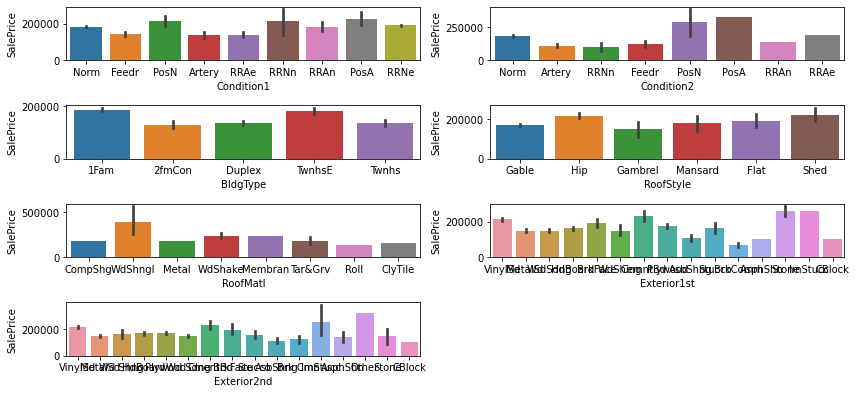

In [37]:
plt.figure(figsize=(12,12))

for i, var in enumerate(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd']):
    plt.subplot(9,2,i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x = housing[var], y = housing['SalePrice'])
    plt.tight_layout()

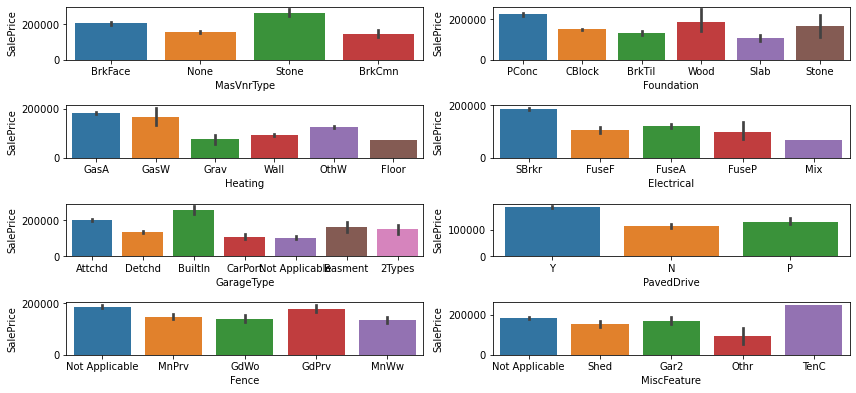

In [38]:
plt.figure(figsize=(12,12))

for i, var in enumerate(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature']):
    plt.subplot(9,2,i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x = housing[var], y = housing['SalePrice'])
    plt.tight_layout()

**Encoding For Categorical Variables**
**Ordered Features -- to be label encoded**
'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',
'GarageCond', 'CentralAir'

**Unordered Features -- to be one hot encoded**
'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

**Encoding categorical feature**

In [39]:
housing['FireplaceQu'] = housing['FireplaceQu'].map({'Not Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

housing['LotShape'] = housing['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing['Utilities'] = housing['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing['LandSlope'] = housing['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing['HouseStyle'] = housing['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing['ExterQual'] = housing['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['ExterCond'] = housing['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['BsmtQual'] = housing['BsmtQual'].map({'Not Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtCond'] = housing['BsmtCond'].map({'Not Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Not Applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'Not Applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'Not Applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['HeatingQC'] = housing['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['CentralAir'] = housing['CentralAir'].map({'N':0,'Y':1})
housing['KitchenQual'] = housing['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['GarageFinish'] = housing['GarageFinish'].map({'Not Applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing['GarageQual'] = housing['GarageQual'].map({'Not Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['GarageCond'] = housing['GarageCond'].map({'Not Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['Functional'] = housing['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})


Encoding unordered categorical variable

In [40]:
dummy_var = pd.get_dummies(housing[unordered_features], drop_first=True)

In [41]:
dummy_var.shape

(1451, 144)

**Comment:**

- Adding 144 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [42]:
dummies_to_drop = []
for i in dummy_var.columns:
    if dummy_var[i].value_counts()[0]/dummy_var.shape[0] > 0.95:
        dummies_to_drop.append(i)
        
print(dummies_to_drop)

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [43]:
dummy_var = dummy_var.drop(dummies_to_drop, axis=1)

print(dummy_var.shape)

(1451, 52)


In [44]:
housing = pd.concat([housing,dummy_var], axis=1)

In [45]:
housing.shape

(1451, 119)

In [46]:
housing = housing.drop(unordered_features, axis=1)

**Splitting into train and Test data**

In [47]:
X = housing.drop('SalePrice',axis=1)

In [48]:
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not Applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not Applicable,MiscFeature_Not Applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,19,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,46,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,21,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,107,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,22,...,0,0,1,0,1,1,0,1,1,0


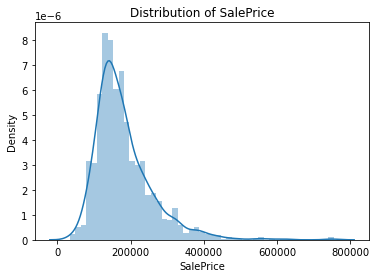

In [49]:
plt.title('Distribution of SalePrice')
sns.distplot(housing['SalePrice'])
plt.show()

**Note** : Looking at above distplot, dependent variable i.e "SalePrice" seems to be right skewed.

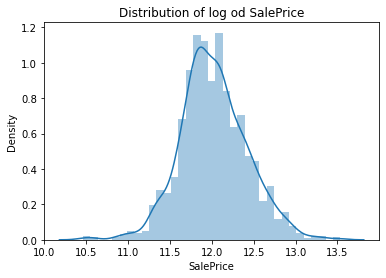

In [50]:
plt.title('Distribution of log od SalePrice')
sns.distplot(np.log(housing['SalePrice']))
plt.show()

We can use transformed data which is log of SalePrice, which will be normally distributed

In [51]:
y = np.log(housing['SalePrice'])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)

In [53]:
X['LotFrontage'].isnull().sum()

257

In [54]:
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [55]:
X_train[['LotFrontage']]  = si.transform(X_train[['LotFrontage']])

In [56]:
X_train['LotFrontage'].isnull().sum()

0

In [57]:
X_test[['LotFrontage']]  = si.transform(X_test[['LotFrontage']])

**Feature Scaling**

In [58]:
X_train.values

array([[5.0000e+01, 5.4000e+01, 6.3420e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.4500e+02, 2.7500e+01, 2.5220e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 7.0000e+01, 7.9310e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [5.0000e+01, 5.0000e+01, 9.0000e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 4.8000e+01, 1.0635e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 6.7000e+01, 1.0656e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [59]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [60]:
X_train_scale = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)

In [61]:
X_test_scale = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [62]:
X_train_scale

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not Applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not Applicable,MiscFeature_Not Applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,-0.137941,-0.840191,-0.892882,0.747271,0.029374,-0.225421,0.179294,-0.787347,2.015381,2.859644,...,-0.605238,4.104407,-3.273709,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
1,2.389253,-2.335542,-1.956426,0.747271,0.029374,-0.225421,0.690305,0.689327,-0.563311,-1.112036,...,1.652242,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
2,-0.936002,0.062662,-0.450481,0.747271,0.029374,-0.225421,-0.842727,-0.787347,-0.563311,0.389860,...,-0.605238,-0.243641,0.305464,-0.342832,-2.005404,0.186522,-0.298667,0.385376,0.472894,-0.302078
3,-0.936002,0.000000,-0.396469,-1.386037,0.029374,-0.225421,-0.842727,-1.525684,-1.594788,-0.010646,...,-0.605238,4.104407,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
4,-0.936002,0.062662,-0.450481,0.747271,0.029374,-0.225421,-0.842727,-0.787347,0.468166,0.356484,...,1.652242,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,0.128080,0.683374,0.388382,-1.386037,0.029374,-0.225421,0.690305,0.689327,-0.563311,-0.778281,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
1156,2.389253,-2.335542,-2.214237,0.747271,0.029374,-0.225421,2.734348,-1.525684,-0.563311,-0.077397,...,-0.605238,-0.243641,0.305464,-0.342832,-2.005404,0.186522,-0.298667,0.385376,0.472894,-0.302078
1157,-0.137941,-1.065905,-0.152856,0.747271,0.029374,-0.225421,0.179294,-0.049010,0.468166,1.124120,...,1.652242,-0.243641,-3.273709,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
1158,-0.936002,-1.178761,0.302352,-0.674935,0.029374,-0.225421,-0.842727,1.427663,-0.563311,-1.078660,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078


**Feature selection using RFE**

Since we will be trying with different number of features.We can write a function which will take number of feature and returns best n features

In [63]:
def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_train_scale,y_train)
    rfe = RFE(linear_m, n)
    rfe = rfe.fit(X_train_scale,y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_train_scale.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [64]:
top_40 = top_n_features(40)
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 40 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not Applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 45 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'Garage

In [65]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,columns):
    X_train_OLS = sm.add_constant(X_train[columns])
    lr1 = sm.OLS(y_train.values.reshape(-1,1),X_train_OLS).fit()
    print(lr1.summary())


In [66]:
build_regressor(X_train_scale,y_train,top_40)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     297.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:18:17   Log-Likelihood:                 864.72
No. Observations:                1160   AIC:                            -1647.
Df Residuals:                    1119   BIC:                            -1440.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [67]:
build_regressor(X_train_scale,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     268.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:18:17   Log-Likelihood:                 874.21
No. Observations:                1160   AIC:                            -1656.
Df Residuals:                    1114   BIC:                            -1424.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [68]:
build_regressor(X_train_scale,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     242.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:18:17   Log-Likelihood:                 878.86
No. Observations:                1160   AIC:                            -1656.
Df Residuals:                    1109   BIC:                            -1398.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [69]:
build_regressor(X_train_scale,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     226.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:18:17   Log-Likelihood:                 885.04
No. Observations:                1160   AIC:                            -1660.
Df Residuals:                    1105   BIC:                            -1382.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Comment:** By inspecting adjusted R-square value of linear regression model with top 40,top 45, top 50 and top 55 features, top 55 features seem to be optimum as models with 45 and 50 features have the same adjusted R-squared value on the training data.

In [70]:
X_train_rfe = X_train_scale[top_55]
X_test_rfe = X_test_scale[top_55]

Below is the reusable code for Cross-Validation , Model Building (Ridge and Lasso) and model evaluation

In [97]:
def build_temp_model(X_train, y_train, X_test, paramsa, model='ridge'):
    if model=='ridge':
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()
    model_cv = GridSearchCV(estimator = estimator_model,
                           param_grid = params,
                           scoring='neg_mean_absolute_error',
                           cv = 5,
                           return_train_score=True,
                           verbose=1)
    
    model_cv.fit(X_train,y_train)
    alpha = model_cv.best_params_["alpha"]
    print("Optimum aplha for %s is %f" %(model, alpha))
    final_model = model_cv.best_estimator_
    
    final_model.fit(X_train,y_train)
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)
    
    #Evaluating model
    print(model,"Regression with",alpha)
    print("===============================")
    print('R2 Score (train) : ', r2_score(y_train, y_train_pred))
    print('R2 Score (test) : ', r2_score(y_test, y_test_pred))
    print('RMSE (train) : ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
    print('RMSE (test) : ',np.sqrt(mean_squared_error(y_test,y_test_pred)))
    
    return final_model, y_test_pred

Ridge Regression

In [98]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_temp_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum aplha for ridge is 10.000000
ridge Regression with 10.0
R2 Score (train) :  0.9168908447027774
R2 Score (test) :  0.873014948602806
RMSE (train) :  0.11289771548276484
RMSE (test) :  0.1523521619609823


Lasso Regression

In [99]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_temp_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum aplha for lasso is 0.000100
lasso Regression with 0.0001
R2 Score (train) :  0.9169731799366677
R2 Score (test) :  0.8725229295812081
RMSE (train) :  0.1128417784253933
RMSE (test) :  0.15264703009942346


In [74]:
#Lets compare coefficients of both model 

model_coeff = pd.DataFrame(index=X_test_rfe.columns)
model_coeff.rows = X_test_rfe.columns

model_coeff['Ridge (alpha=10.0)'] = ridge_final_model.coef_
model_coeff['Lasso (alpha=0.0001)'] =lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coeff

,Ridge (alpha=10.0),Lasso (alpha=0.0001)
MSSubClass,-0.006236,-0.006743
LotFrontage,0.007826,0.007121
LotArea,0.030866,0.030403
LandSlope,0.007763,0.007725
OverallQual,0.076693,0.076865
OverallCond,0.050370,0.051204
YearBuilt,-0.037259,-0.040505
BsmtQual,0.021677,0.021420
BsmtExposure,0.009938,0.009827
BsmtFinSF1,0.026846,0.026683


In [75]:
#Converting the predictions to its original scale by using exp

test_pred = np.round(np.exp(y_test_predicted)).astype(int)
print(test_pred[:5])

[295433 220627 132919 117648 145384]


**Final Model**

Lasso Regression produced slightly better R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [76]:
# 55 features ordered by feature importance in Lasso Regression

model_coeff[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

,Lasso (alpha=0.0001)
1stFlrSF,0.126967
2ndFlrSF,0.107395
OverallQual,0.076865
OverallCond,0.051204
SaleCondition_Partial,0.034227
MSZoning_RL,0.030487
LotArea,0.030403
SaleCondition_Normal,0.028847
BsmtFinSF1,0.026683
Condition1_Norm,0.024549


In [77]:
model_coeff[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond',
       'SaleCondition_Partial', 'MSZoning_RL', 'LotArea',
       'SaleCondition_Normal', 'BsmtFinSF1', 'Condition1_Norm'],
      dtype='object')

### Summary

- First the housing data is read and analyzed dividing the features into numerical and categorical types.


- SalePrice is the dependant or target column here.


- All the features are then analyzed, missing data handling, outlier detection, data cleaning are done. Trend of SalePrice is 
observed for change in individual features.


- New features are extracted, redundant features dropped and categorical features are encoded accordingly.


- Then the data in split into train and test data and feature scaling is performed.


- Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.


- Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.


- Top 55 features are selected through RFE and adjusted R-square. 55 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not Applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']


- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.
Optimum alpha = 10.0 for ridge and 0.0001 for lasso model.


- Model evaluation is done with R2 score and Root Mean Square Error.


- Lasso Regression is chosen as final model for having slightly better R-square value on test data.


- Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable. 


- Predicted value of SalePrice is tranformed into its original scale by performing antilog. 



**Assignment Part - II**

What is the optimal value of alpha for ridge and lasso regression? 
- Optimal value of alpha for ridge : 10.0
- Optimal value of alpha for ridge : 0.0001

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [78]:
# Optimal value of alpha for ridge : 20.0

ridge_model = Ridge(alpha=20.0)
ridge_model.fit(X_train_rfe,y_train)

y_train_pred_ridge = ridge_model.predict(X_train_rfe)
y_test_pred_ridge = ridge_model.predict(X_test_rfe)

print("Model evaluation : Ridge regression with alpha = 20.0")
print('R2 Score (Train): ',round(r2_score(y_train,y_train_pred_ridge),5))
print('R2 Score (Test): ',round(r2_score(y_test,y_test_pred_ridge),5))
print('RMSE (Train): ',round(np.sqrt(mean_squared_error(y_train,y_train_pred_ridge)),5))
print('RMSE (Test): ',round(np.sqrt(mean_squared_error(y_test,y_test_pred_ridge)),5))


Model evaluation : Ridge regression with alpha = 20.0
R2 Score (Train):  0.91665
R2 Score (Test):  0.87368
RMSE (Train):  0.11306
RMSE (Test):  0.15195


In [79]:
lasso_model = Ridge(alpha=0.0002)
lasso_model.fit(X_train_rfe,y_train)

y_train_pred_lasso = lasso_model.predict(X_train_rfe)
y_test_pred_lasso = lasso_model.predict(X_test_rfe)

print("Model evaluation : Lasso regression with alpha = 0.0002")
print('R2 Score (Train): ',round(r2_score(y_train,y_train_pred_lasso),5))
print('R2 Score (Test): ',round(r2_score(y_test,y_test_pred_lasso),5))
print('RMSE (Train): ',round(np.sqrt(mean_squared_error(y_train,y_train_pred_lasso)),5))
print('RMSE (Test): ',round(np.sqrt(mean_squared_error(y_test,y_test_pred_lasso)),5))

Model evaluation : Lasso regression with alpha = 0.0002
R2 Score (Train):  0.917
R2 Score (Test):  0.87193
RMSE (Train):  0.11283
RMSE (Test):  0.153


In [80]:
model_coeff['Ridge (alpha = 20.0)'] = ridge_model.coef_
model_coeff['Lasso (alpha = 0.0002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coeff

,Ridge (alpha=10.0),Lasso (alpha=0.0001),Ridge (alpha = 20.0),Lasso (alpha = 0.0002)
MSSubClass,-0.006236,-0.006743,-0.005397,-0.007293
LotFrontage,0.007826,0.007121,0.008302,0.007314
LotArea,0.030866,0.030403,0.031288,0.030317
LandSlope,0.007763,0.007725,0.007788,0.007727
OverallQual,0.076693,0.076865,0.076687,0.076504
OverallCond,0.050370,0.051204,0.049546,0.051247
YearBuilt,-0.037259,-0.040505,-0.034467,-0.040654
BsmtQual,0.021677,0.021420,0.022028,0.021289
BsmtExposure,0.009938,0.009827,0.009954,0.009915
BsmtFinSF1,0.026846,0.026683,0.027054,0.026553


What will be the most important predictor variables after the change is implemented?

In [81]:
model_coeff.sort_values(by='Ridge (alpha = 20.0)', ascending=False).head(1)

,Ridge (alpha=10.0),Lasso (alpha=0.0001),Ridge (alpha = 20.0),Lasso (alpha = 0.0002)
1stFlrSF,0.122575,0.126967,0.118484,0.127249


In [82]:
model_coeff.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(1)

,Ridge (alpha=10.0),Lasso (alpha=0.0001),Ridge (alpha = 20.0),Lasso (alpha = 0.0002)
1stFlrSF,0.122575,0.126967,0.118484,0.127249


Q3 : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [83]:
model_coeff.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(5)

,Ridge (alpha=10.0),Lasso (alpha=0.0001),Ridge (alpha = 20.0),Lasso (alpha = 0.0002)
1stFlrSF,0.122575,0.126967,0.118484,0.127249
2ndFlrSF,0.102323,0.107395,0.097479,0.107994
OverallQual,0.076693,0.076865,0.076687,0.076504
OverallCond,0.050370,0.051204,0.049546,0.051247
SaleCondition_Partial,0.033693,0.034227,0.033086,0.034276


In [84]:
X_train_mod = X_train_rfe.drop(['1stFlrSF','2ndFlrSF','OverallQual','OverallCond','SaleCondition_Partial'], axis=1)
X_test_mod = X_test_rfe.drop(['1stFlrSF','2ndFlrSF','OverallQual','OverallCond','SaleCondition_Partial'], axis=1)

In [85]:
lasso_model_mod = Lasso(alpha=0.0001)
lasso_model_mod.fit(X_train_mod,y_train)
y_train_pred_mod = lasso_model_mod.predict(X_train_mod)
y_test_pred_mod = lasso_model_mod.predict(X_test_mod)

In [86]:
lasso_model_mod.coef_

array([ 0.00345936,  0.0192952 ,  0.05025483,  0.00249415,  0.02928298,
        0.04211181,  0.01671959,  0.03713165,  0.        ,  0.02698966,
        0.02883019,  0.01188246,  0.08345588,  0.0469578 ,  0.05559559,
       -0.02458446,  0.05272886,  0.01352097,  0.05877395,  0.01799892,
        0.01811357,  0.03121088,  0.01432763, -0.02251604, -0.01808565,
       -0.01111182,  0.01852927, -0.0103912 ,  0.02205217,  0.00491919,
        0.01599934,  0.01023778,  0.00121999, -0.03846281, -0.0102937 ,
       -0.01985718, -0.00966449, -0.03310905,  0.00623856,  0.02934341,
        0.02566495,  0.01487147,  0.02569665,  0.01884258, -0.01607827,
        0.020213  ,  0.01122708,  0.0210373 ,  0.01478513,  0.00669055])

In [87]:
model_coeff_mod = pd.DataFrame(index=X_test_mod.columns)

In [88]:
model_coeff_mod.rows = X_test_mod.columns

In [89]:
model_coeff_mod['Lasso'] = lasso_model_mod.coef_
model_coeff_mod.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
FullBath,0.083456
GarageArea,0.058774
KitchenQual,0.055596
Fireplaces,0.052729
LotArea,0.050255
